In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# M40006 In-Course Assessment Resit

# 25 June 2021, 9-11 am

## Two Hours

### Answer all questions, submitting your answers as a single Jupyter notebook.

## Question 1 (20 marks)

A <b>binary tree</b> is a branching data structure resembling a family tree. Each data item may have at most two "children", and there can be as many "generations" as we like.

A Python list can be used to represent a certain type of binary tree, using the rule "The data item at position $i$ has its children at positions $2i+1$ and $2i+2$, if those positions exist."

The following function takes as its argument a Python list, tuple or array, and shows it as a binary tree, using the above rule:

In [3]:
def plotTree(data):
    """
    Plots a python list in the form of a 'family' tree, in which each data element at
    position i is treated as the 'parent' of the elements at positions (2*i+1) and (2*i+2),
    if they exist.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # number of data items and number of rows
    n = len(data)
    nrows = int(np.ceil(np.log2(len(data)+1)))
    
    # positions of points for plot, as a list and as an array
    points = [[0,0]] + [[2**(nrows-row-1)*(2*r+1),-row] \
                        for row in range(1,nrows) for r in range(-2**(row-1),2**(row-1))]
    points = points[0:n]
    pointsArray = np.array(points)
    
    # plot the edges in the tree
    for row in range(nrows-1):
        for parentIndex in range(2**row-1,2**(row+1)-1):
            # left and right child positions
            leftChildIndex = 2*parentIndex+1
            rightChildIndex = 2*parentIndex+2
            # does this parent have any children at all?
            if leftChildIndex < len(data):
                # line between left child and parent
                group = [points[leftChildIndex],points[parentIndex]]
                # does this parent have a right child?
                if rightChildIndex < len(data):
                    # extend line between parent and right child
                    group += [points[rightChildIndex]]
                # plot the line
                groupArray = np.array(group)
                plt.plot(groupArray[:,0],groupArray[:,1],'b') 
                
    # plot nodes of tree
    plt.plot(pointsArray[:,0],pointsArray[:,1],'ro',markersize=30)
    
    # insert data at nodes
    for r in range(n):
        plt.text(pointsArray[r,0],pointsArray[r,1],data[r],fontsize=14,ha='center',va='center')
    
    # delete axis ticks
    plt.tick_params(
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False
    )

(a) Using this function, show the binary tree corresponding to the list [1, 4, 2, 5, 3, 6, 0].

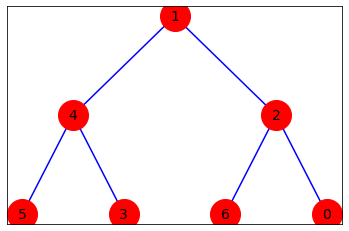

In [2]:
plotTree([1, 4, 2, 5, 3, 6, 0])

(b) What are the children of the data item 2?

(c) What is the parent of the data item 5?

A binary tree is known as a <b>max heap</b> if the value of every parent is greater than or equal to the values of each of its children.

(d) Explain briefly why the list [1, 4, 2, 5, 3, 6, 0] does not represent a max heap.

(e) Find a list containing an arrangement of the integers between 0 and 6 inclusive that does represent a max heap, and illustrate this using `plotTree`.

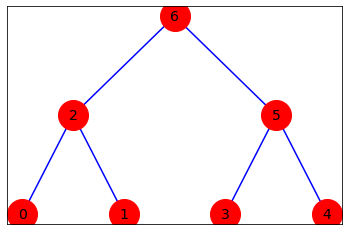

In [5]:
data = [6, 2, 5, 0, 1, 3, 4]
plotTree(data)

## Question 2 (35 marks)

It is useful to be able to convert any given binary tree into a max heap. The key to doing that is by finding any parents that are less than either of their children, and swapping the position of parent and child.

The following function does this. It takes three arguments: a list of data representing a binary tree, a maximum length (data after this is ignored, for reasons we'll come to) and a parent position. It then checks whether the parent is less than either of its children, and if so, swaps the positions of the parent and the greatest child.

In [6]:
def swapNodes(data, length, parentPosition):
    """
    Checks whether a given parent is less than either of its children and, if so, 
    swaps positions with the child whose value is greatest.
    """
    
    # positions of children in the list
    leftChildPosition, rightChildPosition = 2*parentPosition + 1, 2*parentPosition + 2
    # current maximum is parent
    maxPosition = parentPosition
    
    # is left child among the data we're considering?
    if leftChildPosition < length:
        # is parent smaller than left child?
        if data[maxPosition] < data[leftChildPosition]:
            # current maximum is left child
            maxPosition = leftChildPosition
    
    # is right child among the data we're considering?
    if rightChildPosition < length:
        # is parent smaller than right child?
        if data[maxPosition] < data[rightChildPosition]:
            # current maximum is right child
            maxPosition = rightChildPosition
    
    # is a swap necessary?
    if parentPosition != maxPosition:
        # perform swap
        data[parentPosition], data[maxPosition] = data[maxPosition], data[parentPosition]

Note that this function rearranges in place, rather than returning a value.

(a) Test the function by setting

```python
data = [1, 4, 2, 5, 3, 6, 0] 
```

and then attempting a swap at parent position 0, with `length` set to 7. Explain briefly how you know it has worked.

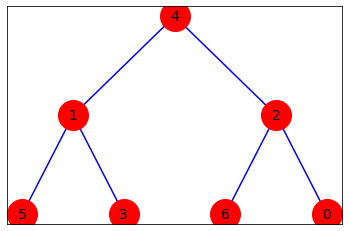

In [7]:
data = [1, 4, 2, 5, 3, 6, 0] 
swapNodes(data, 7, 0)
plotTree(data)

To be useful, the `swapNodes` function needs not just to perform one swap, but as many as are necessary in order to move the parent as low as it will go in the tree. 

So, in our example, after we've swapped at parent position 0, and the value 1 has swapped with 4 and moved to position 1, we then need to swap at parent position 1, so the value 1 gets swapped with 5, and moves down to position 3.

(b) Add a line to the `swapNodes` function so that if a swap is necessary, it not only performs that swap, but then <i>calls itself recursively</i>, with the same values of `data` and `length`, but with the new `parentPosition` set to `maxPosition`. 

In [8]:
def swapNodes(data, length, parentPosition):
    """
    Checks whether a given parent is less than either of its children and, if so, 
    swaps positions with the child whose value is greatest.
    """
    
    # positions of children in the list
    leftChildPosition, rightChildPosition = 2*parentPosition + 1, 2*parentPosition + 2
    # current maximum is parent
    maxPosition = parentPosition
    
    # is left child among the data we're considering?
    if leftChildPosition < length:
        # is parent smaller than left child?
        if data[maxPosition] < data[leftChildPosition]:
            # current maximum is left child
            maxPosition = leftChildPosition
    
    # is right child among the data we're considering?
    if rightChildPosition < length:
        # is parent smaller than right child?
        if data[maxPosition] < data[rightChildPosition]:
            # current maximum is right child
            maxPosition = rightChildPosition
    
    # is a swap necessary?
    if parentPosition != maxPosition:
        # perform swap
        data[parentPosition], data[maxPosition] = data[maxPosition], data[parentPosition]
        # call itself recursively
        swapNodes(data, length, maxPosition)

(c) Test your amended function using

```python
data = [1, 4, 2, 5, 3, 6, 0] 
```

You should end up with
```
[4, 5, 2, 1, 3, 6, 0]
```

Briefly explain how you know this means it has worked.

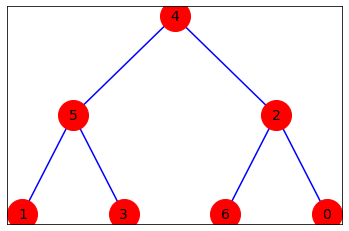

In [9]:
data = [1, 4, 2, 5, 3, 6, 0] 
swapNodes(data, 7, 0)
plotTree(data)

(d) Set 
```python
data = [1, 4, 2, 5, 3, 6, 0] 
```
again, and show that if the recursive version of `swapNodes` is applied to this data first at parent position 2, then at parent position 1, then at parent position 0, with `length` set to 7 each time, the result is a max heap.

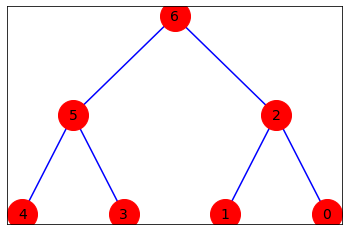

In [10]:
data = [1, 4, 2, 5, 3, 6, 0] 
swapNodes(data, 7, 2)
swapNodes(data, 7, 1)
swapNodes(data, 7, 0)
plotTree(data)

(e) Briefly explain why this works for any list of length 7.

(f) For a list of length 7, we start at parent position 2 and work backwards; in general, for a list of length n, we can start at parent position `n//2-1` and work backwards.

Write a function called `toMaxHeap` that takes any list of numbers and, by applying `swapNodes` in this way, converts it into a max heap.

In [11]:
def toMaxHeap(data):
    n = len(data)
    for pos in range(n//2-1,-1,-1):
        swapNodes(data, n, pos)

(g) Test your `toMaxHeap` function on 
```python
data = [1, 4, 2, 5, 3, 6, 0] 
```
and on at least one other list of your own.

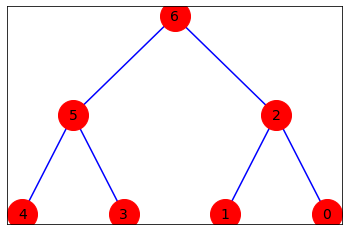

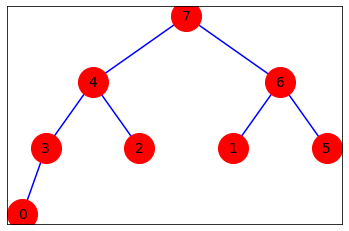

In [12]:
data = [1, 4, 2, 5, 3, 6, 0]
toMaxHeap(data)
plotTree(data)
plt.show()
from random import shuffle
data = list(range(8))
shuffle(data)
toMaxHeap(data)
plotTree(data)

## Question 3 (20 marks)
<b>Note: parts (a), (b), (c) and (d) of this question can be attempted even if you were not able to get <code>toMaxHeap</code> to work in question 2.</b>

(a) Explain briefly why the first element of a list that represents a max heap is always the maximum value in the list.

The above fact can be used as the basis of a sorting algorithm. Once a list of data of length 7 has been sorted into a max heap, we can proceed as follows:

<ul>
    <li>Swap elements 0 and 6, meaning that the last element is the maximum.</li>
    <li>Apply the recursive <code>swapNodes</code> to the data, with <code>length</code> set to 6 and <code>parentPosition</code> set to 0.</li>
    <li>Swap elements 0 and 5.</li>
    <li>Apply the recursive <code>swapNodes</code> to the data, with <code>length</code> set to 5 and <code>parentPosition</code> set to 0.</li>
    <li>Swap elements 0 and 4.</li>
    <li>...</li>
    <li>Swap elements 0 and 1.</li>
</ul>

(b) Show that this successfully sorts the max heap [6, 5, 2, 4, 3, 1, 0].

In [13]:
data = [6, 5, 2, 4, 3, 1, 0]
for i in range(6,1,-1):
    data[0], data[i] = data[i], data[0]
    swapNodes(data, i, 0)
data[0], data[1] = data[1], data[0]
print(data)

[0, 1, 2, 3, 4, 5, 6]


(c) Write a function called `sortMaxHeap` that takes as its sole argument a list of numbers `data`, assumed to be already a max heap, and sorts it in place into ascending order.

In [14]:
def sortMaxHeap(data):
    for i in range(len(data)-1,1,-1):
        data[0], data[i] = data[i], data[0]
        swapNodes(data, i, 0)
    data[0], data[1] = data[1], data[0]   

(d) Test  your function on the max heap [6, 5, 2, 4, 3, 1, 0], and on at least one other max heap of your own choosing.

In [15]:
data = [6, 5, 2, 4, 3, 1, 0]
sortMaxHeap(data)
print(data)
from random import shuffle
data = list(range(15))
shuffle(data)
toMaxHeap(data)
sortMaxHeap(data)
print(data)

[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


(e) Write a function called `heapSort` that takes as its sole argument a list of numbers `data`, which can be in any order, and sorts it in place by first converting it into a max heap, and then sorting this max heap.

In [16]:
def heapSort(data):
    toMaxHeap(data)
    sortMaxHeap(data)

(f) Test your function on
```python
data = [1, 4, 2, 5, 3, 6, 0]
```
and on at least one other list of your own.

In [17]:
data = [1, 4, 2, 5, 3, 6, 0]
heapSort(data)
print(data)
from random import shuffle
data = list(range(15))
shuffle(data)
heapSort(data)
print(data)

[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


## Question 4 (25 marks)

(a) Add a global variable called `comparisonCount` to the code listing for (the recursive version of) `swapNodes`, which goes up by 1 every time the value of one variable is compared with another.

In [18]:
def swapNodes(data, length, parentPosition):
    """
    Checks whether a given parent is less than either of its children and, if so, 
    swaps positions with the child whose value is greatest.
    """
    global comparisonCount
    
    # positions of children in the list
    leftChildPosition, rightChildPosition = 2*parentPosition + 1, 2*parentPosition + 2
    # current maximum is parent
    maxPosition = parentPosition
    
    # is left child among the data we're considering?
    if leftChildPosition < length:
        # is parent smaller than left child?
        comparisonCount += 1
        if data[maxPosition] < data[leftChildPosition]:
            # current maximum is left child
            maxPosition = leftChildPosition
    
    # is right child among the data we're considering?
    if rightChildPosition < length:
        # is parent smaller than right child?
        comparisonCount += 1
        if data[maxPosition] < data[rightChildPosition]:
            # current maximum is right child
            maxPosition = rightChildPosition
    
    # is a swap necessary?
    if parentPosition != maxPosition:
        # perform swap
        data[parentPosition], data[maxPosition] = data[maxPosition], data[parentPosition]
        # call itself recursively
        swapNodes(data, length, maxPosition)

(b) Hence, show that the number of comparisons necessary to sort the max heap [6, 2, 5, 0, 1, 3, 4] using `sortMaxHeap` is 10, and find the number of comparisons necessary to sort the max heap [6, 5, 2, 4, 3, 1, 0] in the same way. (These are known to be the minimum and maximum values.)

In [19]:

comparisonCount = 0
data = [6, 2, 5, 0, 1, 3, 4] 
sortMaxHeap(data)
print(comparisonCount)
comparisonCount = 0
data = [6, 5, 2, 4, 3, 1, 0]  
sortMaxHeap(data)
print(comparisonCount)

10
14


(c) Find the number of comparisons that take place if `toMaxHeap` is run on a list of length 7 that is already a max heap (this is known to be the minimum).

In [20]:
comparisonCount = 0
data = [6, 5, 2, 4, 3, 1, 0]  
toMaxHeap(data)
print(comparisonCount)

6


(d) State, with reasons, the minimum number of comparisons necessary to sort a list of length 7 using `heapSort`.


(e) Find the number of comparisons that take place if `toMaxHeap` is run on a list of length 7 that is already in ascending order (this is known to be the maximum).

In [21]:
comparisonCount = 0
data = [0, 1, 2, 3, 4, 5, 6]  
toMaxHeap(data)
print(comparisonCount)

8


(f) Give, with reasons, an upper bound on the maximum number of comparisons necessary to sort a list of length 7 using `heapSort`. Explain carefully why, on the basis of the information you have been given, it is not clear whether this upper bound is attained.


(g) It is difficult to obtain, but an expression for the minimum number of comparisons necessary to sort a list of length $2^r-1$ using this particular implementation of `heapSort` is

$$(2r-5)2^r+r+5.$$

Describe the algorithm using big Omega notation.

(h) <b>[Challenging]</b> In fact, the upper bound from part (f) <i>is</i> attained. Find a list of length 7 for which exactly this many comparisons are necessary in order to sort it using `heapSort`.

In [22]:
comparisonCount = 0
data = [3, 4, 0, 5, 6, 1, 2] 
heapSort(data)
print(comparisonCount)

22


In [23]:
comparisonCount = 0
data = [1, 2, 3, 4, 5, 6, 6] 
heapSort(data)
print(comparisonCount)

21
